Combine into single file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:

# Get all CSV files in the Colab directory
csv_files = ["Alandur.csv", "Crescent chengalpattu.csv", "Kodungaiyur.csv", "Manali.csv", "Ooty.csv", "Perungudi.csv", "Ramanathapuram.csv", "Royapuram.csv", "Salem.csv", "Tirupur.csv", "Velachery.csv", "Vellore.csv"]

# Read and concatenate all CSV files
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("train_notprocessed.csv", index=False)

print("Combined CSV file saved as train_notprocessed.csv")


Combined CSV file saved as train_notprocessed.csv


Verifying concatenation

In [ ]:
sha = 0
for file in csv_files:
  sha += pd.read_csv(file).shape[0]
print(sha)


8772


In [ ]:
df = pd.read_csv("train_notprocessed.csv")

In [ ]:
df.shape[0]

8772

In [ ]:
df.isnull().sum()

,0
ID_Date,0
StateCode,0
StationId,0
Date,0
PM2.5,1330
PM10,1136
NO2,1374
CO,1082
O3,1071
Unnamed: 9,8730


In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Drop unnecessary column if present
df.drop(columns=['Unnamed: 9'], inplace=True, errors='ignore')

In [ ]:
# Summary statistics
summary = df.describe(include='all')
print(summary)

                ID_Date StateCode    StationId                 Date  \
count              8772      8772  8772.000000                 8772   
unique             8772         1          NaN                  NaN   
top     TN_1_2023-01-01        TN          NaN                  NaN   
freq                  1      8772          NaN                  NaN   
mean                NaN       NaN     6.500000  2024-01-01 00:00:00   
min                 NaN       NaN     1.000000  2023-01-01 00:00:00   
25%                 NaN       NaN     3.750000  2023-07-02 00:00:00   
50%                 NaN       NaN     6.500000  2024-01-01 00:00:00   
75%                 NaN       NaN     9.250000  2024-07-02 00:00:00   
max                 NaN       NaN    12.000000  2024-12-31 00:00:00   
std                 NaN       NaN     3.452249                  NaN   

              PM2.5         PM10          NO2           CO           O3  
count   7442.000000  7636.000000  7398.000000  7690.000000  7701.000000  

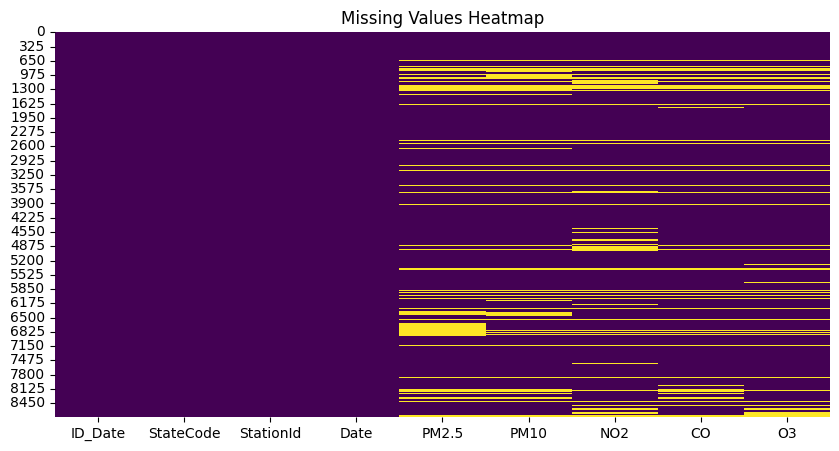

In [ ]:
# Missing values visualization
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

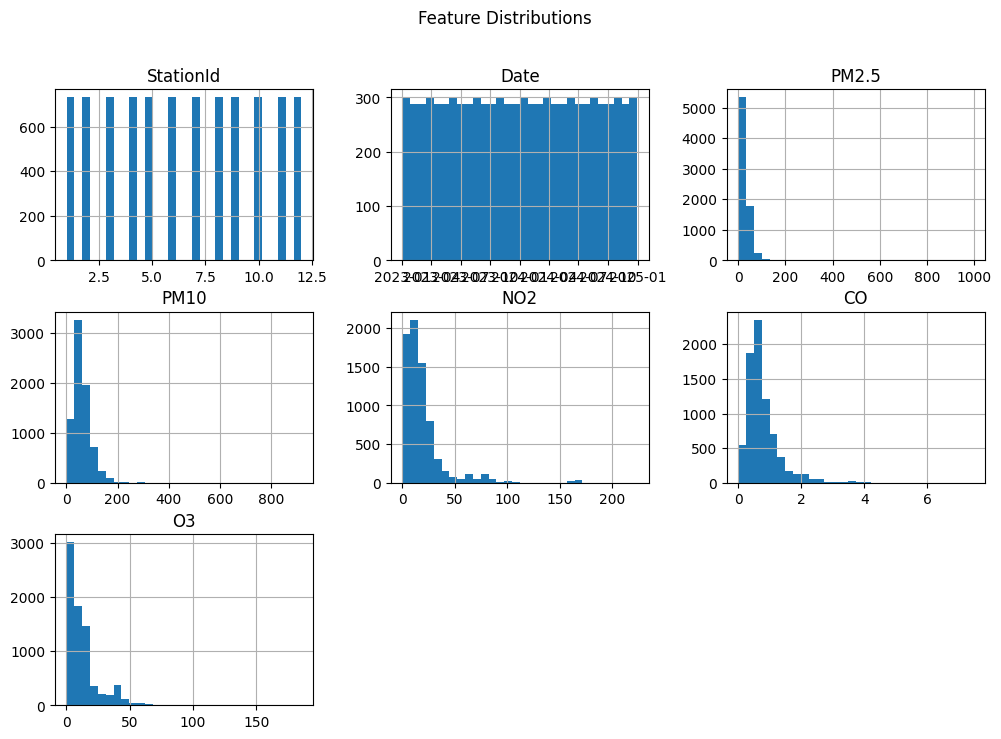

In [ ]:
# Distribution of numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

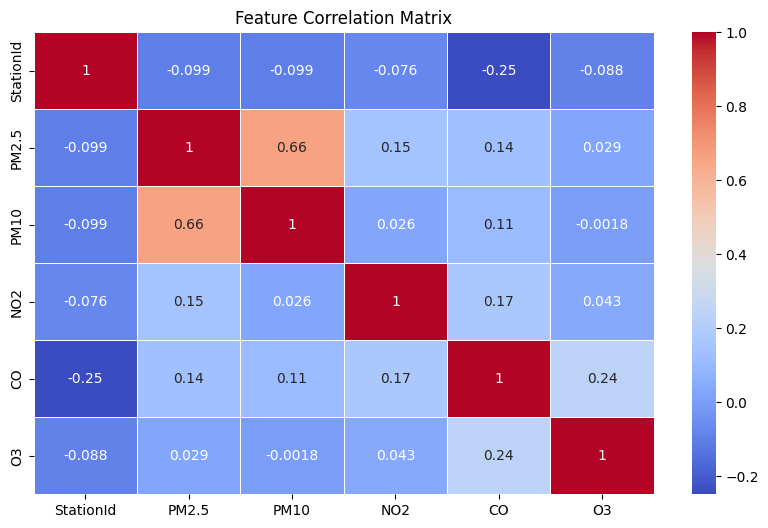

In [ ]:
# Correlation heatmap (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Save summary to CSV
summary.to_csv("eda_summary.csv")

In [ ]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Information:")
print(df.info())

Dataset Shape: (8772, 10)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_Date     8772 non-null   object 
 1   StateCode   8772 non-null   object 
 2   StationId   8772 non-null   int64  
 3   Date        8772 non-null   object 
 4   PM2.5       7442 non-null   float64
 5   PM10        7636 non-null   float64
 6   NO2         7398 non-null   float64
 7   CO          7690 non-null   float64
 8   O3          7701 non-null   float64
 9   Unnamed: 9  42 non-null     float64
dtypes: float64(6), int64(1), object(3)
memory usage: 685.4+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
ID_Date         0
StateCode       0
StationId       0
Date            0
PM2.5        1330
PM10         1136
NO2          1374
CO           1082
O3           1071
dtype: int64


In [ ]:
# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         StationId                 Date        PM2.5         PM10  \
count  8772.000000                 8772  7442.000000  7636.000000   
mean      6.500000  2024-01-01 00:00:00    27.792892    62.108542   
min       1.000000  2023-01-01 00:00:00     0.048125     1.340000   
25%       3.750000  2023-07-02 00:00:00    14.252500    37.507652   
50%       6.500000  2024-01-01 00:00:00    22.444688    55.005000   
75%       9.250000  2024-07-02 00:00:00    35.547609    77.772500   
max      12.000000  2024-12-31 00:00:00   995.000000   916.714687   
std       3.452249                  NaN    22.902029    37.993219   

               NO2           CO           O3  
count  7398.000000  7690.000000  7701.000000  
mean     19.270074     0.773751    13.088276  
min       0.010000     0.001000     0.215833  
25%       7.198438     0.442543     5.289022  
50%      13.400388     0.640000     8.080000  
75%      22.395163     0.930000    14.983021  
max     224.254130     7

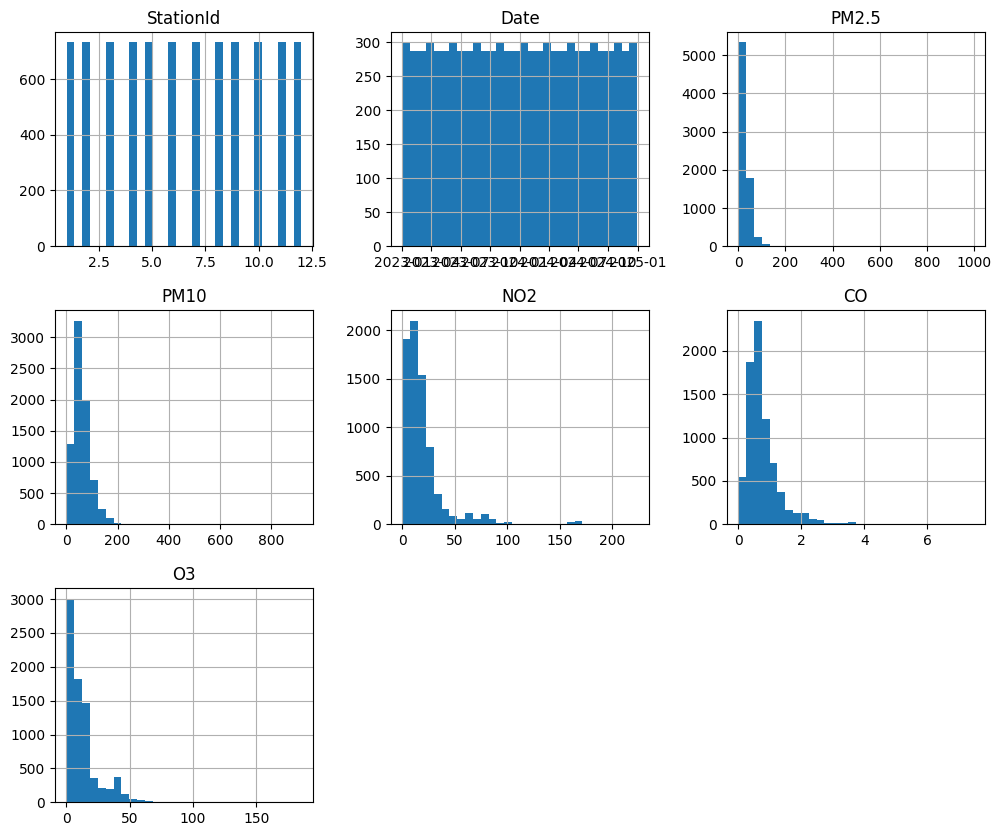

In [ ]:

# Data distribution
df.hist(figsize=(12, 10), bins=30)
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'TN_1_2023-01-01'

<Figure size 1000x600 with 0 Axes>

Data Preprocessing

In [ ]:

from sklearn.impute import KNNImputer


# Drop unnecessary columns
df.drop(columns=['StateCode'], inplace=True)  # StateCode has only one unique value

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select numerical columns for imputation
num_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Apply KNN imputation
df[num_cols] = imputer.fit_transform(df[num_cols])


print("Missing values handled using KNN Imputer.")


Missing values handled using KNN Imputer.


In [ ]:


# Function to cap outliers using IQR method
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply IQR capping
df = cap_outliers(df, num_cols)


print("Outliers handled using IQR method. File saved as train_outliers_handled.csv")


Outliers handled using IQR method. File saved as train_outliers_handled.csv


In [ ]:
# Apply log transformation (adding 1 to avoid log(0))
for col in num_cols:
    df[col] = np.log1p(df[col])  # log1p is log(1 + x) to handle zeros safely

In [ ]:
print("Data normalized using log transformation")

Data normalized using log transformation


In [ ]:
df.to_csv("train_processed.csv", index=False)

**Future Implementations**

Extracting meaningful features from date column

In [ ]:
import pandas as pd

# Load the preprocessed dataset
file_path = "train_processed.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime if not already in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, day, and day of week (0=Monday, 6=Sunday)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.weekday


# Create binary Is_Weekend column using the day name
df['Is_Weekend'] = df['Date'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)


# Save the updated dataset
df.to_csv("train_date_features.csv", index=False)

print("Date features extracted and file saved as train_date_features.csv")


Date features extracted and file saved as train_date_features.csv


Using api to fetch public holidays

In [ ]:
import pandas as pd

# Helper function to convert an integer day to its ordinal string (e.g., 1 -> "1st")
def ordinal(n):
    if 10 <= n % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(n % 10, 'th')
    return str(n) + suffix

# Provided holiday dictionaries for 2023 and 2024
holidays_2023 = {
    "January": [
        {"date": "January 1st", "holiday": "New Year's Day"},
        {"date": "January 2nd", "holiday": "Second Day of the New Year"},
        {"date": "January 3rd", "holiday": "Imoinu Iratpa"},
        {"date": "January 4th", "holiday": "Gann-Ngai"},
        {"date": "January 5th", "holiday": "Guru Gobind Singh's Birthday"},
        {"date": "January 11th", "holiday": "Missionary Day"},
        {"date": "January 12th", "holiday": "Swami Vivekananda's Birthday"},
        {"date": "January 14th", "holiday": "Makara Sankranti"},
        {"date": "January 14th", "holiday": "Pongal"},
        {"date": "January 14th", "holiday": "Makar Sankranti"},
        {"date": "January 15th", "holiday": "Sankranti"},
        {"date": "January 15th", "holiday": "Magh Bihu"},
        {"date": "January 15th", "holiday": "Tusu Puja"},
        {"date": "January 15th", "holiday": "Pongal"},
        {"date": "January 16th", "holiday": "Kanuma"},
        {"date": "January 16th", "holiday": "Thiruvalluvar Day"},
        {"date": "January 22nd", "holiday": "Sonam Lhosar"},
        {"date": "January 22nd", "holiday": "Tibetan New Year"},
        {"date": "January 23rd", "holiday": "Netaji Subhas Chandra Bose's Birthday"},
        {"date": "January 25th", "holiday": "Statehood Day"},
        {"date": "January 26th", "holiday": "Republic Day"},
        {"date": "January 26th", "holiday": "Vasant Panchami"},
        {"date": "January 31st", "holiday": "Me-dam-me-phi"}
    ],
    "February": [
        {"date": "February 5th", "holiday": "Bir Chilarai Divas"},
        {"date": "February 5th", "holiday": "Guru Ravidas' Birthday"},
        {"date": "February 5th", "holiday": "Bhumchu Festival"},
        {"date": "February 5th", "holiday": "Thaipoosam"},
        {"date": "February 5th", "holiday": "Imam Ali's Birthday"},
        {"date": "February 14th", "holiday": "Valentine's Day"},
        {"date": "February 15th", "holiday": "Lui-Ngai-Ni"},
        {"date": "February 18th", "holiday": "Maha Shivratri"},
        {"date": "February 18th", "holiday": "Muhammad's Ascension to Heaven"},
        {"date": "February 19th", "holiday": "Chahhtrapati Shivaji Maharaj's Birthday"},
        {"date": "February 20th", "holiday": "Statehood Day"},
        {"date": "February 20th", "holiday": "Mizoram State Day"}
    ],
    "March": [
        {"date": "March 3rd", "holiday": "Chapchar Kut"},
        {"date": "March 5th", "holiday": "Biju Patnaik's Birthday"},
        {"date": "March 7th", "holiday": "Doljatra"},
        {"date": "March 7th", "holiday": "Day before the Festival of Colors"},
        {"date": "March 8th", "holiday": "Festival of Colors"},
        {"date": "March 8th", "holiday": "International Women's Day"},
        {"date": "March 9th", "holiday": "Second Day of Yaosang"},
        {"date": "March 20th", "holiday": "March Equinox"},
        {"date": "March 21st", "holiday": "Persian New Year's Day"},
        {"date": "March 22nd", "holiday": "Ugadi"},
        {"date": "March 22nd", "holiday": "BIhar Divas"},
        {"date": "March 22nd", "holiday": "Marathi Hindu New Year's Day"},
        {"date": "March 22nd", "holiday": "Sindhi New Year's Day"},
        {"date": "March 22nd", "holiday": "Navratra"},
        {"date": "March 22nd", "holiday": "Sajibu Nongma Panba"},
        {"date": "March 23rd", "holiday": "Shaheedi Diwas of Bhagat Singh, Rajguru and Sukhdev"},
        {"date": "March 24th", "holiday": "Sarhul"},
        {"date": "March 28th", "holiday": "Shab-e-Barat"},
        {"date": "March 30th", "holiday": "Rama Navami"},
        {"date": "March 30th", "holiday": "Ram Navami"}
    ],
    "April": [
        {"date": "April 1st", "holiday": "Bank Holiday"},
        {"date": "April 1st", "holiday": "Odisha Day"},
        {"date": "April 4th", "holiday": "Mahavira's Birthday"},
        {"date": "April 5th", "holiday": "Babu Jagjivan Ram's Birthday"},
        {"date": "April 7th", "holiday": "Good Friday"},
        {"date": "April 8th", "holiday": "Sri Guru Nabha Dass Ji's Birthday"},
        {"date": "April 9th", "holiday": "Easter"},
        {"date": "April 12th", "holiday": "Assamese New Year's Eve"},
        {"date": "April 13th", "holiday": "Assamese New Year's Day"},
        {"date": "April 14th", "holiday": "Vaisakhi"},
        {"date": "April 14th", "holiday": "Maha Vishuba Sankranti"},
        {"date": "April 14th", "holiday": "Doctor Ambedkar's Birthday"},
        {"date": "April 14th", "holiday": "Tamil New Year's Day"},
        {"date": "April 14th", "holiday": "Biju Festival"},
        {"date": "April 14th", "holiday": "Cheiraoba"},
        {"date": "April 14th", "holiday": "Ashoka's Birthday"},
        {"date": "April 15th", "holiday": "Himachal Day"},
        {"date": "April 15th", "holiday": "Vishu"},
        {"date": "April 15th", "holiday": "Bengali New Year's Day"},
        {"date": "April 18th", "holiday": "Night of Destiny"},
        {"date": "April 20th", "holiday": "Tithi of Damodardev"},
        {"date": "April 21st", "holiday": "Jumat-ul-Wida"},
        {"date": "April 21st", "holiday": "Garia Puja"},
        {"date": "April 21st", "holiday": "Festival of Breaking the Fast"},
        {"date": "April 22nd", "holiday": "Parashurama's Birthday"},
        {"date": "April 22nd", "holiday": "Festival of Breaking the Fast"},
        {"date": "April 23rd", "holiday": "Basavanna's Birthday"},
        {"date": "April 23rd", "holiday": "Second Day of the Festival of Breaking the Fast"},
        {"date": "April 23rd", "holiday": "Parashurama's Birthday"},
        {"date": "April 23rd", "holiday": "Veer Kunwar Singh's Birthday"}
    ],
    "May": [
        {"date": "May 1st", "holiday": "Labor Day"},
        {"date": "May 1st", "holiday": "Maharashtra Day"},
        {"date": "May 1st", "holiday": "Guru Tegh Bahadur Ji's Birthday"},
        {"date": "May 5th", "holiday": "Buddha's Birthday"},
        {"date": "May 9th", "holiday": "Rabindra Nath Tagore's Birthday"},
        {"date": "May 14th", "holiday": "Mother's Day"},
        {"date": "May 16th", "holiday": "Sikkim State Day"},
        {"date": "May 22nd", "holiday": "Maharana Pratap's Birthday"},
        {"date": "May 23rd", "holiday": "Martyrdom Day of Sri Guru Arjun Dev Ji"}
    ],
    "June": [
        {"date": "June 3rd", "holiday": "Sant Guru Kabir's Birthday"},
        {"date": "June 4th", "holiday": "Buddha's Birthday"},
        {"date": "June 5th", "holiday": "Madhavdev's Birthday"},
        {"date": "June 14th", "holiday": "Pahili Raja"},
        {"date": "June 15th", "holiday": "YMA Day"},
        {"date": "June 15th", "holiday": "Raja Sankranti"},
        {"date": "June 18th", "holiday": "Father's Day"},
        {"date": "June 20th", "holiday": "Rath Yatra"},
        {"date": "June 21st", "holiday": "June Solstice"},
        {"date": "June 26th", "holiday": "Kharchi Puja"},
        {"date": "June 28th", "holiday": "Feast of the Sacrifice"},
        {"date": "June 29th", "holiday": "Feast of the Sacrifice"},
        {"date": "June 30th", "holiday": "Remna Ni"}
    ],
    "July": [
        {"date": "July 5th", "holiday": "Guru Hargobind's Birthday"},
        {"date": "July 6th", "holiday": "MHIP Day"},
        {"date": "July 9th", "holiday": "Behdienkhlam"},
        {"date": "July 11th", "holiday": "Ker Puja"},
        {"date": "July 16th", "holiday": "Harela"},
        {"date": "July 17th", "holiday": "Tirot Sing's Birthday"},
        {"date": "July 17th", "holiday": "Bonalu"},
        {"date": "July 21st", "holiday": "Anniversary of Lord Buddha's First Sermon"},
        {"date": "July 28th", "holiday": "Ashura"},
        {"date": "July 29th", "holiday": "Ashura"},
        {"date": "July 29th", "holiday": "Feast of the Sacrifice"},
        {"date": "July 31st", "holiday": "Martyrdom Day of Shaheed Udham Singh"}
    ],
    "August": [
        {"date": "August 6th", "holiday": "Friendship Day"},
        {"date": "August 9th", "holiday": "Day of the Adivasi"},
        {"date": "August 13th", "holiday": "Patriot's Day"},
        {"date": "August 15th", "holiday": "Independence Day"},
        {"date": "August 16th", "holiday": "Parsi New Year's Day"},
        {"date": "August 16th", "holiday": "De Jure Transfer Day"},
        {"date": "August 28th", "holiday": "Onam"},
        {"date": "August 29th", "holiday": "Thiruvonam"},
        {"date": "August 30th", "holiday": "Raksha Bandhan"},
        {"date": "August 31st", "holiday": "Raksha Bandhan"},
        {"date": "August 31st", "holiday": "Sree Narayana Guru's Birthday"}
    ],
    "September": [
        {"date": "September 4th", "holiday": "Tithi of Madhavdev"},
        {"date": "September 6th", "holiday": "Chehlum"},
        {"date": "September 6th", "holiday": "Janmashtami"},
        {"date": "September 7th", "holiday": "Janmashtami"},
        {"date": "September 18th", "holiday": "Ganesh Chaturthi"},
        {"date": "September 18th", "holiday": "Samvatsari"},
        {"date": "September 19th", "holiday": "Day after Ganesh Chaturthi"},
        {"date": "September 19th", "holiday": "Nuakhai"},
        {"date": "September 21st", "holiday": "Sree Narayana Guru Samadhi"},
        {"date": "September 23rd", "holiday": "September Equinox"},
        {"date": "September 23rd", "holiday": "Haryana Heroes' Martyrdom Day"},
        {"date": "September 28th", "holiday": "Baba Ramdev's Birthday"},
        {"date": "September 28th", "holiday": "Birth of the Prophet"},
        {"date": "September 29th", "holiday": "Friday after the Feast of the Sacrifice"}
    ],
    "October": [
        {"date": "October 2nd", "holiday": "Mahatma Gandhi's Birthday"},
        {"date": "October 5th", "holiday": "Nar Bahadur Bhandari's Birthday"},
        {"date": "October 14th", "holiday": "Mahalaya"},
        {"date": "October 14th", "holiday": "Bathukamma"},
        {"date": "October 15th", "holiday": "Maharaja Agrasen's Birthday"},
        {"date": "October 15th", "holiday": "Mera Chaoren Houba"},
        {"date": "October 18th", "holiday": "Kati Bihu"},
        {"date": "October 21st", "holiday": "Maha Saptami"},
        {"date": "October 22nd", "holiday": "Durgashtami"},
        {"date": "October 22nd", "holiday": "Durga Ashtami"},
        {"date": "October 23rd", "holiday": "Navami of Durga Puja"},
        {"date": "October 23rd", "holiday": "Mahanavami"},
        {"date": "October 23rd", "holiday": "Ayudha Puja"},
        {"date": "October 24th", "holiday": "Vijayadashami"},
        {"date": "October 24th", "holiday": "Dussehra"},
        {"date": "October 24th", "holiday": "Durga Puja"},
        {"date": "October 24th", "holiday": "Srimanta Sankardeva's Birthday"},
        {"date": "October 24th", "holiday": "Vijayasasami"},
        {"date": "October 26th", "holiday": "Accession Day"},
        {"date": "October 28th", "holiday": "Kumar Purnima"},
        {"date": "October 28th", "holiday": "Lakshmi Puja"},
        {"date": "October 28th", "holiday": "Maharishi Valmiki's Birthday"},
        {"date": "October 31st", "holiday": "Sardar Patel's Birthday"}
    ],
    "November": [
        {"date": "November 1st", "holiday": "Haryana Day"},
        {"date": "November 1st", "holiday": "Kannada Rajyothsava"},
        {"date": "November 1st", "holiday": "Kut"},
        {"date": "November 1st", "holiday": "Puducherry Liberation Day"},
        {"date": "November 4th", "holiday": "Descending Day of Lord Buddha"},
        {"date": "November 10th", "holiday": "Wangala Festival"},
        {"date": "November 12th", "holiday": "Naraka Chaturdasi"},
        {"date": "November 12th", "holiday": "Festival of Lights"},
        {"date": "November 12th", "holiday": "Kali Puja"},
        {"date": "November 13th", "holiday": "Govardhan Puja"},
        {"date": "November 13th", "holiday": "Vishvakarma Day"},
        {"date": "November 13th", "holiday": "Day after Diwali"},
        {"date": "November 13th", "holiday": "Festival of Lights"},
        {"date": "November 14th", "holiday": "Vikram Samvat New Year's Day"},
        {"date": "November 14th", "holiday": "Vishvakarma Day"},
        {"date": "November 14th", "holiday": "Govardhan Puja"},
        {"date": "November 14th", "holiday": "Bhai Bij"},
        {"date": "November 15th", "holiday": "Ningol Chakouba"},
        {"date": "November 15th", "holiday": "Bhai Duj"},
        {"date": "November 18th", "holiday": "Chhath Puja"},
        {"date": "November 19th", "holiday": "Day after Chhath Puja"},
        {"date": "November 23rd", "holiday": "Seng Kut Snem"},
        {"date": "November 24th", "holiday": "Lachit Divas"},
        {"date": "November 27th", "holiday": "Guru Nanak's Birthday"},
        {"date": "November 27th", "holiday": "Rasa Purnima"},
        {"date": "November 30th", "holiday": "Kanakadasa's Birthday"}
    ],
    "December": [
        {"date": "December 1st", "holiday": "Indigenous Faith Day"},
        {"date": "December 1st", "holiday": "State Inauguration Day"},
        {"date": "December 2nd", "holiday": "Asom Divas"},
        {"date": "December 3rd", "holiday": "Feast of Saint Francis Xavier"},
        {"date": "December 17th", "holiday": "Martyrdom of Sri Guru Teg Bahadur Ji"},
        {"date": "December 18th", "holiday": "Guru Ghasidas' Birthday"},
        {"date": "December 18th", "holiday": "Death Anniversary of U Soso Tham"},
        {"date": "December 19th", "holiday": "Goa Liberation Day"},
        {"date": "December 22nd", "holiday": "December Solstice"},
        {"date": "December 23rd", "holiday": "Day before Christmas Eve"},
        {"date": "December 24th", "holiday": "Christmas Eve"},
        {"date": "December 25th", "holiday": "Christmas Day"},
        {"date": "December 26th", "holiday": "Day after Christmas"},
        {"date": "December 26th", "holiday": "Boxing Day"},
        {"date": "December 27th", "holiday": "Christmas Festival"},
        {"date": "December 27th", "holiday": "Christmas Holiday"},
        {"date": "December 28th", "holiday": "Second Day of the Christmas Holiday"},
        {"date": "December 29th", "holiday": "Third Day of the Christmas Holiday"},
        {"date": "December 30th", "holiday": "U Kiang Nangbah"},
        {"date": "December 30th", "holiday": "Fourth Day of the Christmas Holiday"},
        {"date": "December 30th", "holiday": "Tamu Lhosar"},
        {"date": "December 31st", "holiday": "New Year's Eve"},
        {"date": "December 31st", "holiday": "Fifth Day of the Christmas Holiday"},
        {"date": "December 31st", "holiday": "Barahimizong"}
    ]
}

holidays_2024 = {
    "January": [
        {"date": "January 1st", "holiday": "New Year's Day"},
        {"date": "January 2nd", "holiday": "Second Day of the New Year"},
        {"date": "January 3rd", "holiday": "Imoinu Iratpa"},
        {"date": "January 4th", "holiday": "Gann-Ngai"},
        {"date": "January 5th", "holiday": "Guru Gobind Singh's Birthday"},
        {"date": "January 11th", "holiday": "Missionary Day"},
        {"date": "January 12th", "holiday": "Swami Vivekananda's Birthday"},
        {"date": "January 14th", "holiday": "Makara Sankranti"},
        {"date": "January 14th", "holiday": "Pongal"},
        {"date": "January 14th", "holiday": "Makar Sankranti"},
        {"date": "January 15th", "holiday": "Sankranti"},
        {"date": "January 15th", "holiday": "Magh Bihu"},
        {"date": "January 15th", "holiday": "Tusu Puja"},
        {"date": "January 15th", "holiday": "Pongal"},
        {"date": "January 16th", "holiday": "Kanuma"},
        {"date": "January 16th", "holiday": "Thiruvalluvar Day"},
        {"date": "January 22nd", "holiday": "Sonam Lhosar"},
        {"date": "January 22nd", "holiday": "Tibetan New Year"},
        {"date": "January 23rd", "holiday": "Netaji Subhas Chandra Bose's Birthday"},
        {"date": "January 25th", "holiday": "Statehood Day"},
        {"date": "January 26th", "holiday": "Republic Day"},
        {"date": "January 26th", "holiday": "Vasant Panchami"},
        {"date": "January 31st", "holiday": "Me-dam-me-phi"}
    ],
    "February": [
        {"date": "February 5th", "holiday": "Bir Chilarai Divas"},
        {"date": "February 5th", "holiday": "Guru Ravidas' Birthday"},
        {"date": "February 5th", "holiday": "Bhumchu Festival"},
        {"date": "February 5th", "holiday": "Thaipoosam"},
        {"date": "February 5th", "holiday": "Imam Ali's Birthday"},
        {"date": "February 14th", "holiday": "Valentine's Day"},
        {"date": "February 15th", "holiday": "Lui-Ngai-Ni"},
        {"date": "February 18th", "holiday": "Maha Shivratri"},
        {"date": "February 18th", "holiday": "Muhammad's Ascension to Heaven"},
        {"date": "February 19th", "holiday": "Chahhtrapati Shivaji Maharaj's Birthday"},
        {"date": "February 20th", "holiday": "Statehood Day"},
        {"date": "February 20th", "holiday": "Mizoram State Day"}
    ],
    "March": [
        {"date": "March 3rd", "holiday": "Chapchar Kut"},
        {"date": "March 5th", "holiday": "Biju Patnaik's Birthday"},
        {"date": "March 7th", "holiday": "Doljatra"},
        {"date": "March 7th", "holiday": "Day before the Festival of Colors"},
        {"date": "March 8th", "holiday": "Festival of Colors"},
        {"date": "March 8th", "holiday": "International Women's Day"},
        {"date": "March 9th", "holiday": "Second Day of Yaosang"},
        {"date": "March 20th", "holiday": "March Equinox"},
        {"date": "March 21st", "holiday": "Persian New Year's Day"},
        {"date": "March 22nd", "holiday": "Ugadi"},
        {"date": "March 22nd", "holiday": "BIhar Divas"},
        {"date": "March 22nd", "holiday": "Marathi Hindu New Year's Day"},
        {"date": "March 22nd", "holiday": "Sindhi New Year's Day"},
        {"date": "March 22nd", "holiday": "Navratra"},
        {"date": "March 22nd", "holiday": "Sajibu Nongma Panba"},
        {"date": "March 23rd", "holiday": "Shaheedi Diwas of Bhagat Singh, Rajguru and Sukhdev"},
        {"date": "March 24th", "holiday": "Sarhul"},
        {"date": "March 28th", "holiday": "Shab-e-Barat"},
        {"date": "March 30th", "holiday": "Rama Navami"},
        {"date": "March 30th", "holiday": "Ram Navami"}
    ],
    "April": [
        {"date": "April 1st", "holiday": "Bank Holiday"},
        {"date": "April 1st", "holiday": "Odisha Day"},
        {"date": "April 4th", "holiday": "Mahavira's Birthday"},
        {"date": "April 5th", "holiday": "Babu Jagjivan Ram's Birthday"},
        {"date": "April 7th", "holiday": "Good Friday"},
        {"date": "April 8th", "holiday": "Sri Guru Nabha Dass Ji's Birthday"},
        {"date": "April 9th", "holiday": "Easter"},
        {"date": "April 12th", "holiday": "Assamese New Year's Eve"},
        {"date": "April 13th", "holiday": "Assamese New Year's Day"},
        {"date": "April 14th", "holiday": "Vaisakhi"},
        {"date": "April 14th", "holiday": "Maha Vishuba Sankranti"},
        {"date": "April 14th", "holiday": "Doctor Ambedkar's Birthday"},
        {"date": "April 14th", "holiday": "Tamil New Year's Day"},
        {"date": "April 14th", "holiday": "Biju Festival"},
        {"date": "April 14th", "holiday": "Cheiraoba"},
        {"date": "April 14th", "holiday": "Ashoka's Birthday"},
        {"date": "April 15th", "holiday": "Himachal Day"},
        {"date": "April 15th", "holiday": "Vishu"},
        {"date": "April 15th", "holiday": "Bengali New Year's Day"},
        {"date": "April 18th", "holiday": "Night of Destiny"},
        {"date": "April 20th", "holiday": "Tithi of Damodardev"},
        {"date": "April 21st", "holiday": "Jumat-ul-Wida"},
        {"date": "April 21st", "holiday": "Garia Puja"},
        {"date": "April 21st", "holiday": "Festival of Breaking the Fast"},
        {"date": "April 22nd", "holiday": "Parashurama's Birthday"},
        {"date": "April 22nd", "holiday": "Festival of Breaking the Fast"},
        {"date": "April 23rd", "holiday": "Basavanna's Birthday"},
        {"date": "April 23rd", "holiday": "Second Day of the Festival of Breaking the Fast"},
        {"date": "April 23rd", "holiday": "Parashurama's Birthday"},
        {"date": "April 23rd", "holiday": "Veer Kunwar Singh's Birthday"}
    ],
    "May": [
        {"date": "May 1st", "holiday": "Labor Day"},
        {"date": "May 1st", "holiday": "Maharashtra Day"},
        {"date": "May 1st", "holiday": "Guru Tegh Bahadur Ji's Birthday"},
        {"date": "May 5th", "holiday": "Buddha's Birthday"},
        {"date": "May 9th", "holiday": "Rabindra Nath Tagore's Birthday"},
        {"date": "May 14th", "holiday": "Mother's Day"},
        {"date": "May 16th", "holiday": "Sikkim State Day"},
        {"date": "May 22nd", "holiday": "Maharana Pratap's Birthday"},
        {"date": "May 23rd", "holiday": "Martyrdom Day of Sri Guru Arjun Dev Ji"}
    ],
    "June": [
        {"date": "June 3rd", "holiday": "Sant Guru Kabir's Birthday"},
        {"date": "June 4th", "holiday": "Buddha's Birthday"},
        {"date": "June 5th", "holiday": "Madhavdev's Birthday"},
        {"date": "June 14th", "holiday": "Pahili Raja"},
        {"date": "June 15th", "holiday": "YMA Day"},
        {"date": "June 15th", "holiday": "Raja Sankranti"},
        {"date": "June 18th", "holiday": "Father's Day"},
        {"date": "June 20th", "holiday": "Rath Yatra"},
        {"date": "June 21st", "holiday": "June Solstice"},
        {"date": "June 26th", "holiday": "Kharchi Puja"},
        {"date": "June 28th", "holiday": "Feast of the Sacrifice"},
        {"date": "June 29th", "holiday": "Feast of the Sacrifice"},
        {"date": "June 30th", "holiday": "Remna Ni"}
    ],
    "July": [
        {"date": "July 5th", "holiday": "Guru Hargobind's Birthday"},
        {"date": "July 6th", "holiday": "MHIP Day"},
        {"date": "July 9th", "holiday": "Behdienkhlam"},
        {"date": "July 11th", "holiday": "Ker Puja"},
        {"date": "July 16th", "holiday": "Harela"},
        {"date": "July 17th", "holiday": "Tirot Sing's Birthday"},
        {"date": "July 17th", "holiday": "Bonalu"},
        {"date": "July 21st", "holiday": "Anniversary of Lord Buddha's First Sermon"},
        {"date": "July 28th", "holiday": "Ashura"},
        {"date": "July 29th", "holiday": "Ashura"},
        {"date": "July 29th", "holiday": "Feast of the Sacrifice"},
        {"date": "July 31st", "holiday": "Martyrdom Day of Shaheed Udham Singh"}
    ],
    "August": [
        {"date": "August 6th", "holiday": "Friendship Day"},
        {"date": "August 9th", "holiday": "Day of the Adivasi"},
        {"date": "August 13th", "holiday": "Patriot's Day"},
        {"date": "August 15th", "holiday": "Independence Day"},
        {"date": "August 16th", "holiday": "Parsi New Year's Day"},
        {"date": "August 16th", "holiday": "De Jure Transfer Day"},
        {"date": "August 28th", "holiday": "Onam"},
        {"date": "August 29th", "holiday": "Thiruvonam"},
        {"date": "August 30th", "holiday": "Raksha Bandhan"},
        {"date": "August 31st", "holiday": "Raksha Bandhan"},
        {"date": "August 31st", "holiday": "Sree Narayana Guru's Birthday"}
    ],
    "September": [
        {"date": "September 4th", "holiday": "Tithi of Madhavdev"},
        {"date": "September 6th", "holiday": "Chehlum"},
        {"date": "September 6th", "holiday": "Janmashtami"},
        {"date": "September 7th", "holiday": "Janmashtami"},
        {"date": "September 18th", "holiday": "Ganesh Chaturthi"},
        {"date": "September 18th", "holiday": "Samvatsari"},
        {"date": "September 19th", "holiday": "Day after Ganesh Chaturthi"},
        {"date": "September 19th", "holiday": "Nuakhai"},
        {"date": "September 21st", "holiday": "Sree Narayana Guru Samadhi"},
        {"date": "September 23rd", "holiday": "September Equinox"},
        {"date": "September 23rd", "holiday": "Haryana Heroes' Martyrdom Day"},
        {"date": "September 28th", "holiday": "Baba Ramdev's Birthday"},
        {"date": "September 28th", "holiday": "Birth of the Prophet"},
        {"date": "September 29th", "holiday": "Friday after the Feast of the Sacrifice"}
    ],
    "October": [
        {"date": "October 2nd", "holiday": "Mahatma Gandhi's Birthday"},
        {"date": "October 5th", "holiday": "Nar Bahadur Bhandari's Birthday"},
        {"date": "October 14th", "holiday": "Mahalaya"},
        {"date": "October 14th", "holiday": "Bathukamma"},
        {"date": "October 15th", "holiday": "Maharaja Agrasen's Birthday"},
        {"date": "October 15th", "holiday": "Mera Chaoren Houba"},
        {"date": "October 18th", "holiday": "Kati Bihu"},
        {"date": "October 21st", "holiday": "Maha Saptami"},
        {"date": "October 22nd", "holiday": "Durgashtami"},
        {"date": "October 22nd", "holiday": "Durga Ashtami"},
        {"date": "October 23rd", "holiday": "Navami of Durga Puja"},
        {"date": "October 23rd", "holiday": "Mahanavami"},
        {"date": "October 23rd", "holiday": "Ayudha Puja"},
        {"date": "October 24th", "holiday": "Vijayadashami"},
        {"date": "October 24th", "holiday": "Dussehra"},
        {"date": "October 24th", "holiday": "Durga Puja"},
        {"date": "October 24th", "holiday": "Srimanta Sankardeva's Birthday"},
        {"date": "October 24th", "holiday": "Vijayasasami"},
        {"date": "October 26th", "holiday": "Accession Day"},
        {"date": "October 28th", "holiday": "Kumar Purnima"},
        {"date": "October 28th", "holiday": "Lakshmi Puja"},
        {"date": "October 28th", "holiday": "Maharishi Valmiki's Birthday"},
        {"date": "October 31st", "holiday": "Sardar Patel's Birthday"}
    ],
    "November": [
        {"date": "November 1st", "holiday": "Haryana Day"},
        {"date": "November 1st", "holiday": "Kannada Rajyothsava"},
        {"date": "November 1st", "holiday": "Kut"},
        {"date": "November 1st", "holiday": "Puducherry Liberation Day"},
        {"date": "November 4th", "holiday": "Descending Day of Lord Buddha"},
        {"date": "November 10th", "holiday": "Wangala Festival"},
        {"date": "November 12th", "holiday": "Naraka Chaturdasi"},
        {"date": "November 12th", "holiday": "Festival of Lights"},
        {"date": "November 12th", "holiday": "Kali Puja"},
        {"date": "November 13th", "holiday": "Govardhan Puja"},
        {"date": "November 13th", "holiday": "Vishvakarma Day"},
        {"date": "November 13th", "holiday": "Day after Diwali"},
        {"date": "November 13th", "holiday": "Festival of Lights"},
        {"date": "November 14th", "holiday": "Vikram Samvat New Year's Day"},
        {"date": "November 14th", "holiday": "Vishvakarma Day"},
        {"date": "November 14th", "holiday": "Govardhan Puja"},
        {"date": "November 14th", "holiday": "Bhai Bij"},
        {"date": "November 15th", "holiday": "Ningol Chakouba"},
        {"date": "November 15th", "holiday": "Bhai Duj"},
        {"date": "November 18th", "holiday": "Chhath Puja"},
        {"date": "November 19th", "holiday": "Day after Chhath Puja"},
        {"date": "November 23rd", "holiday": "Seng Kut Snem"},
        {"date": "November 24th", "holiday": "Lachit Divas"},
        {"date": "November 27th", "holiday": "Guru Nanak's Birthday"},
        {"date": "November 27th", "holiday": "Rasa Purnima"},
        {"date": "November 30th", "holiday": "Kanakadasa's Birthday"}
    ],
    "December": [
        {"date": "December 1st", "holiday": "Indigenous Faith Day"},
        {"date": "December 1st", "holiday": "State Inauguration Day"},
        {"date": "December 2nd", "holiday": "Asom Divas"},
        {"date": "December 3rd", "holiday": "Feast of Saint Francis Xavier"},
        {"date": "December 17th", "holiday": "Martyrdom of Sri Guru Teg Bahadur Ji"},
        {"date": "December 18th", "holiday": "Guru Ghasidas' Birthday"},
        {"date": "December 18th", "holiday": "Death Anniversary of U Soso Tham"},
        {"date": "December 19th", "holiday": "Goa Liberation Day"},
        {"date": "December 22nd", "holiday": "December Solstice"},
        {"date": "December 23rd", "holiday": "Day before Christmas Eve"},
        {"date": "December 24th", "holiday": "Christmas Eve"},
        {"date": "December 25th", "holiday": "Christmas Day"},
        {"date": "December 26th", "holiday": "Day after Christmas"},
        {"date": "December 26th", "holiday": "Boxing Day"},
        {"date": "December 27th", "holiday": "Christmas Festival"},
        {"date": "December 27th", "holiday": "Christmas Holiday"},
        {"date": "December 28th", "holiday": "Second Day of the Christmas Holiday"},
        {"date": "December 29th", "holiday": "Third Day of the Christmas Holiday"},
        {"date": "December 30th", "holiday": "U Kiang Nangbah"},
        {"date": "December 30th", "holiday": "Fourth Day of the Christmas Holiday"},
        {"date": "December 30th", "holiday": "Tamu Lhosar"},
        {"date": "December 31st", "holiday": "New Year's Eve"},
        {"date": "December 31st", "holiday": "Fifth Day of the Christmas Holiday"},
        {"date": "December 31st", "holiday": "Barahimizong"}
    ]
}

# Create mapping dictionaries for 2023 and 2024.
def create_festival_mapping(holiday_dict):
    festival_map = {}
    for month, holiday_list in holiday_dict.items():
        for entry in holiday_list:
            # Each entry's date is already like "January 1st"
            date_key = entry["date"]
            holiday_name = entry["holiday"]
            if date_key in festival_map:
                festival_map[date_key].append(holiday_name)
            else:
                festival_map[date_key] = [holiday_name]
    return festival_map

festival_map_2023 = create_festival_mapping(holidays_2023)
festival_map_2024 = create_festival_mapping(holidays_2024)

# Load the preprocessed dataset
file_path = "train_date_features.csv"
df = pd.read_csv(file_path)

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Function to determine festival for each row
def get_festival(row):
    # Extract the year, month name, and day from the Date
    date_obj = row['Date']
    if pd.isnull(date_obj):
        return "no festival"

    year = date_obj.year
    month_name = date_obj.strftime("%B")
    day_ordinal = ordinal(date_obj.day)
    # Create key in the format "Month dayOrdinal", e.g., "January 1st"
    date_key = f"{month_name} {day_ordinal}"

    # Lookup in the corresponding festival mapping
    if year == 2023:
        festivals = festival_map_2023.get(date_key, None)
    elif year == 2024:
        festivals = festival_map_2024.get(date_key, None)
    else:
        festivals = None

    if festivals:
        # If there are multiple festivals, join them with a comma
        return ", ".join(festivals)
    else:
        return "no festival"

# Apply the function to create the Festival column
df['Festival'] = df.apply(get_festival, axis=1)

# Save the updated dataset
df.to_csv("train_with_festival.csv", index=False)

print("Festival column added and file saved as train_with_festival.csv")


Festival column added and file saved as train_with_festival.csv


Dataset Shape: (8772, 12)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Date         8772 non-null   object 
 1   StationId       8772 non-null   int64  
 2   Date            8772 non-null   object 
 3   PM2.5           8772 non-null   float64
 4   PM10            8772 non-null   float64
 5   NO2             8772 non-null   float64
 6   CO              8772 non-null   float64
 7   O3              8772 non-null   float64
 8   AQI             8772 non-null   float64
 9   HIS             8772 non-null   float64
 10  HRI_Normalized  8772 non-null   float64
 11  HRI_Category    8772 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 822.5+ KB
None

Summary Statistics:
         StationId        PM2.5         PM10          NO2           CO  \
count  8772.000000  8772.000000  8772.00

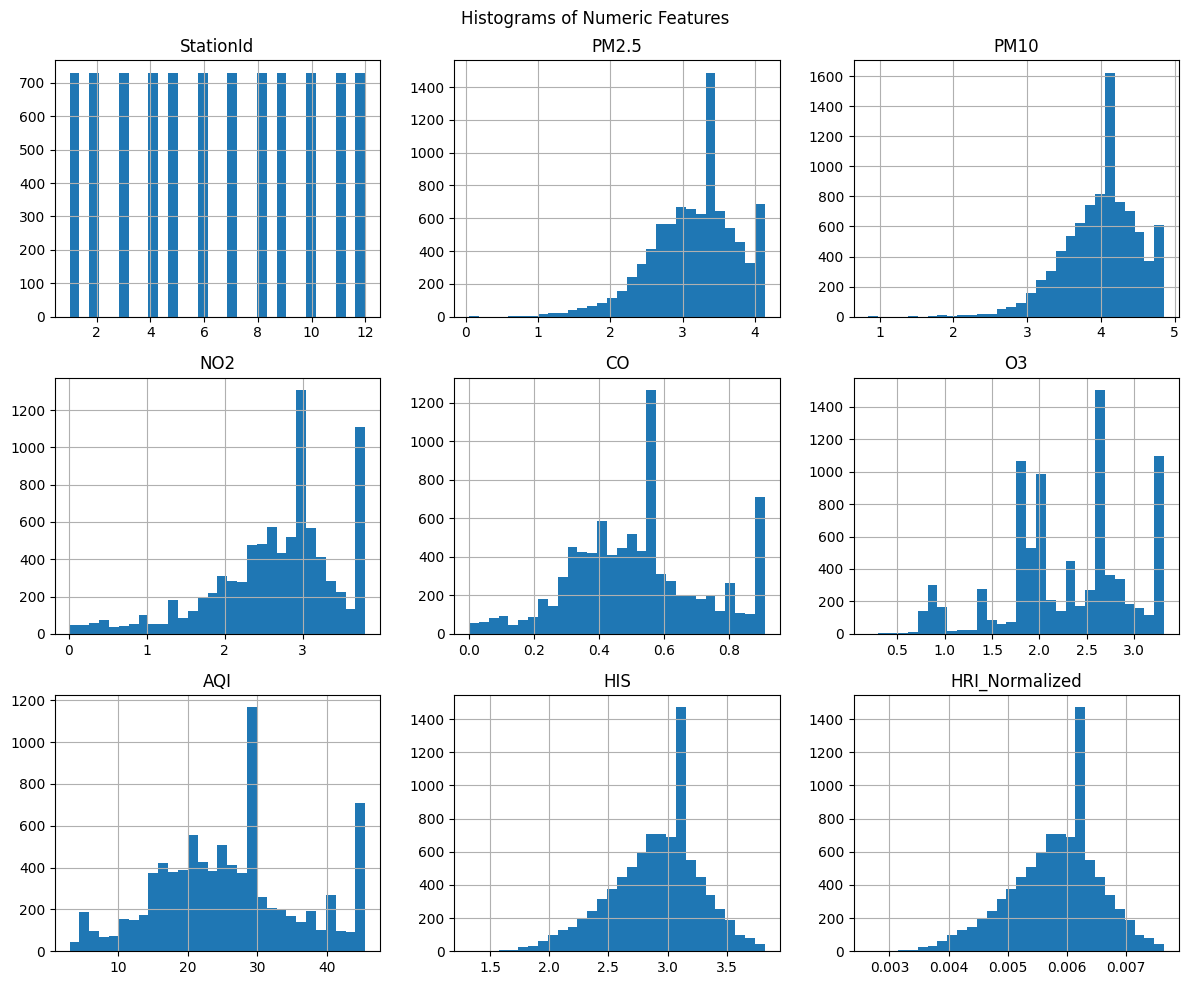

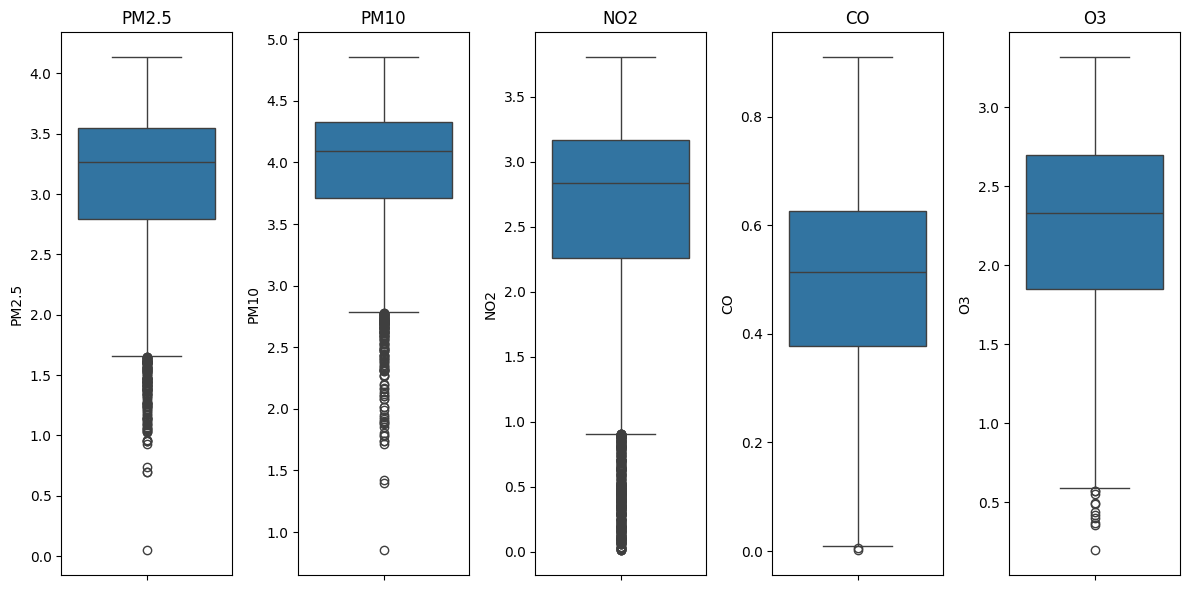

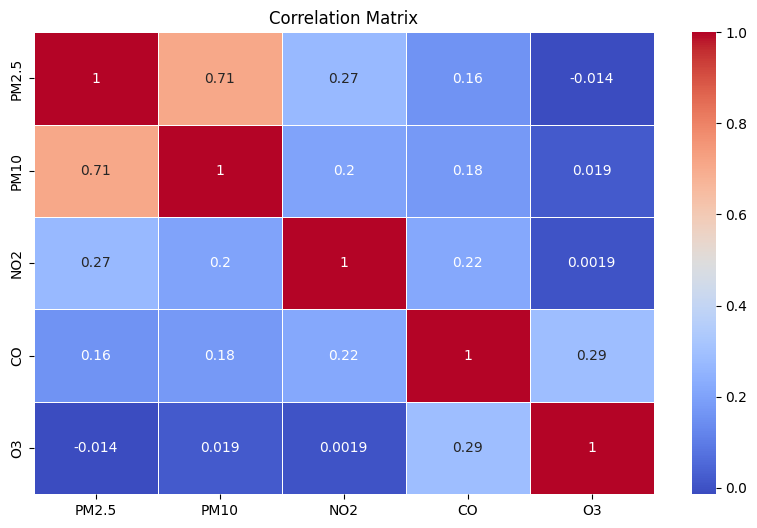

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("HRI.csv")

# 1. Basic Information
print("Dataset Shape:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())

# 2. Summary Statistics for Numeric Features
print("\nSummary Statistics:")
summary = df.describe()
print(summary)

# 3. Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 4. Histograms of Numeric Features to Visualize Distributions
df.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# 5. Boxplots for Outlier Inspection
numeric_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 6. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Dataset Shape: (8772, 8)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8772 entries, 0 to 8771
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_Date    8772 non-null   object 
 1   StationId  8772 non-null   int64  
 2   Date       8772 non-null   object 
 3   PM2.5      8772 non-null   float64
 4   PM10       8772 non-null   float64
 5   NO2        8772 non-null   float64
 6   CO         8772 non-null   float64
 7   O3         8772 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 548.4+ KB
None

Summary Statistics:
         StationId        PM2.5         PM10          NO2           CO  \
count  8772.000000  8772.000000  8772.000000  8772.000000  8772.000000   
mean      6.500000     3.164271     4.005261     2.671533     0.519286   
std       3.452249     0.589228     0.496844     0.818551     0.205460   
min       1.000000     0.047003     0.850151     0

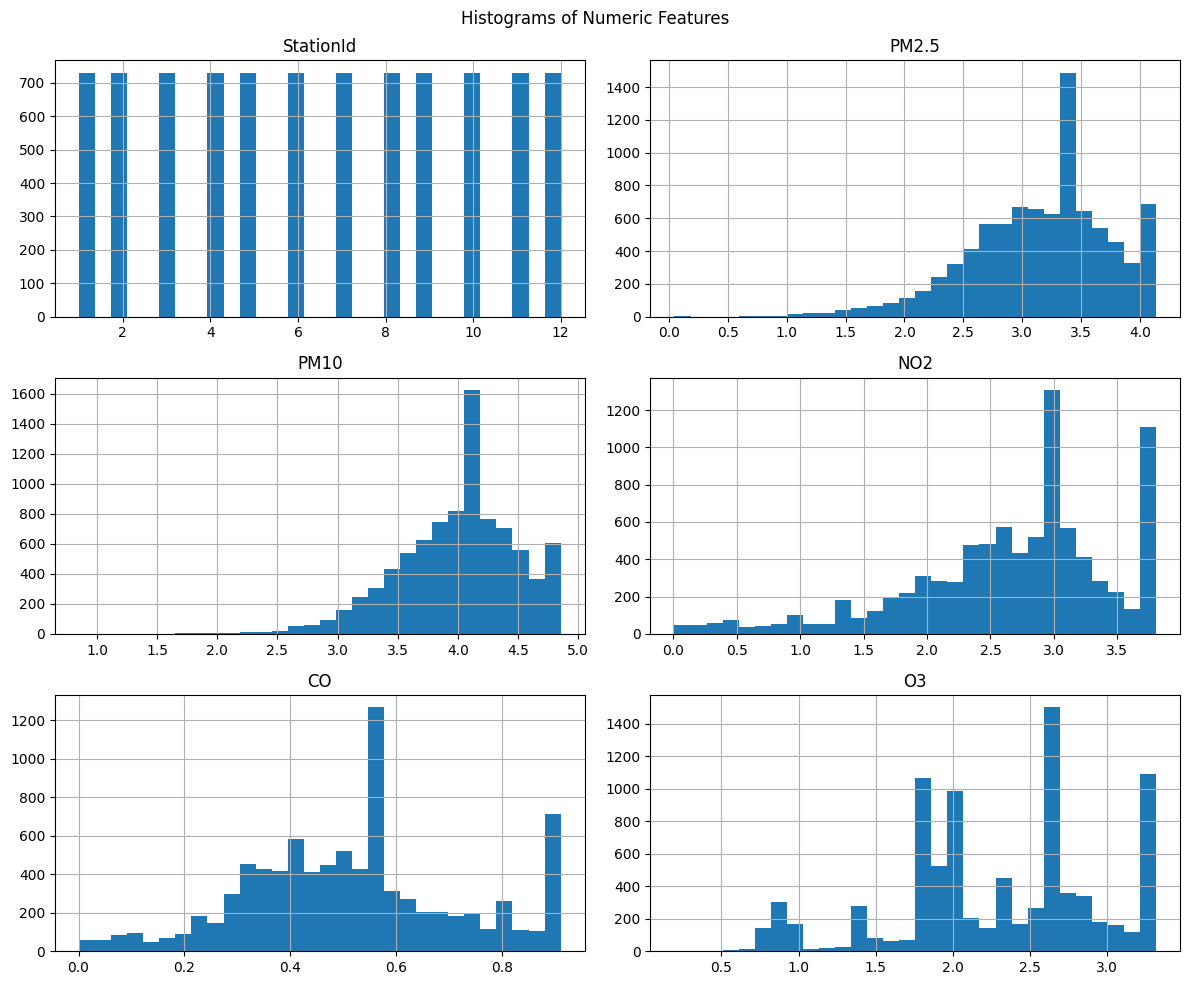

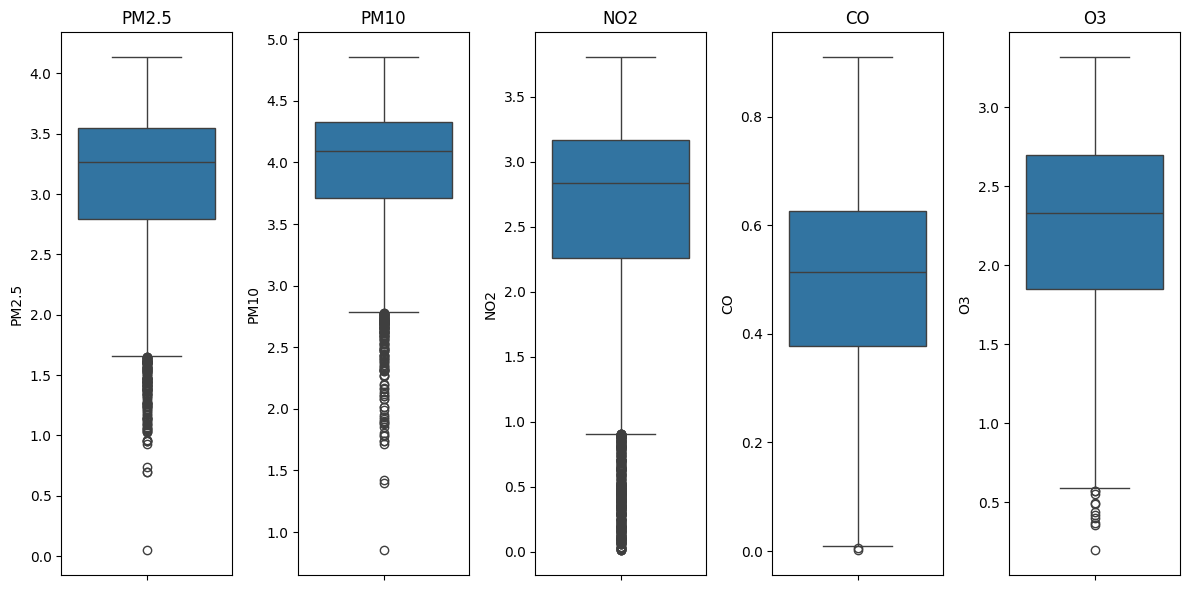

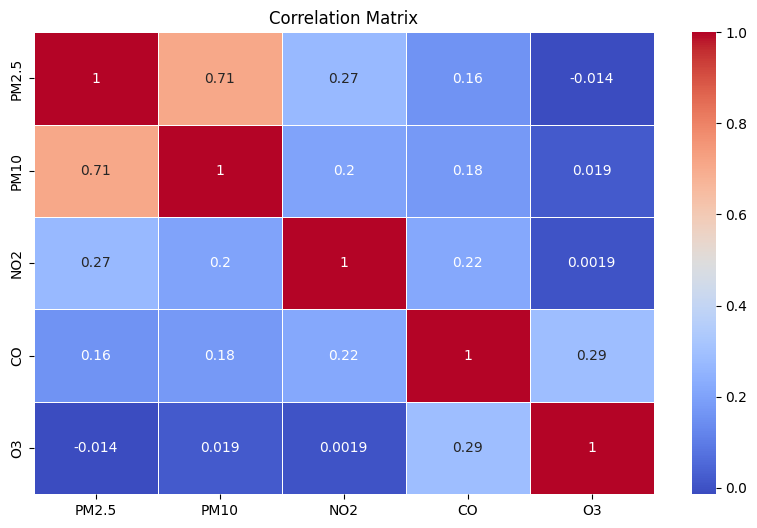

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
df = pd.read_csv("train_processed.csv")

# 1. Basic Information
print("Dataset Shape:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())

# 2. Summary Statistics for Numeric Features
print("\nSummary Statistics:")
summary = df.describe()
print(summary)

# 3. Check for Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# 4. Histograms of Numeric Features to Visualize Distributions
df.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# 5. Boxplots for Outlier Inspection
numeric_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 6. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")


In [7]:
df.to_csv("train2.csv", index=False)

In [6]:
df['Date'] = df['Date'].dt.strftime('%d-%m-%y') # Example: YYYY-MM-DD